## Importing of Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_seq_items',100)
pd.set_option('display.max_colwidth',200)
pd.options.display.float_format = '{:.0f}'.format

## Reading of Sub-Dataset

In [3]:
df_csi = pd.read_csv("dataset/csi.csv")
print(df_csi.shape)
df_csi.head(10)

(640198, 6)


,timestamp,duration_ms,requested_throughput_bps,wideband_cqi,rank1_percentage,rank2_percentage
0,1549638000,516,34324846,9,73,27
1,1549638001,500,29028577,9,100,0
2,1549638001,500,29755796,9,94,6
3,1549638002,500,31872152,9,79,21
4,1549638002,525,32373883,9,91,9
5,1549638003,500,35392893,9,80,20
6,1549638003,510,33054361,9,84,16
7,1549638004,512,31884615,10,96,4
8,1549638004,498,34128348,9,78,22
9,1549638005,504,31907350,10,96,4


In [4]:
column_to_move = df_csi.pop("wideband_cqi")
df_csi['wideband_cqi'] = column_to_move
df_csi.head(10)

,timestamp,duration_ms,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
0,1549638000,516,34324846,73,27,9
1,1549638001,500,29028577,100,0,9
2,1549638001,500,29755796,94,6,9
3,1549638002,500,31872152,79,21,9
4,1549638002,525,32373883,91,9,9
5,1549638003,500,35392893,80,20,9
6,1549638003,510,33054361,84,16,9
7,1549638004,512,31884615,96,4,10
8,1549638004,498,34128348,78,22,9
9,1549638005,504,31907350,96,4,10


In [5]:
df_csi_subband = pd.read_csv("dataset/csi_subband.csv")
print(df_csi_subband.shape)
df_csi_subband.head()

(640198, 14)


,timestamp,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12
0,1549638000,9,10,10,6,7,8,8,6,11,10,10,11,11
1,1549638001,9,10,10,7,7,8,8,6,11,11,10,12,12
2,1549638001,9,10,10,7,7,8,8,6,11,11,10,11,11
3,1549638002,9,10,10,6,7,8,8,6,11,11,10,12,11
4,1549638002,9,11,10,7,7,8,8,6,11,11,10,12,11


In [6]:
df_mac = pd.read_csv("dataset/mac.csv")
print(df_mac.shape)
df_mac.head()

(641314, 8)


,timestamp,throughput_bps,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,residual_bler_percentage,number_of_transport_blocks,new_tb
0,1549638000,33543674,6,0,0,0,709,678
1,1549638001,31138864,9,0,0,0,490,444
2,1549638001,31374016,10,0,0,0,519,469
3,1549638002,32419136,6,0,0,0,739,696
4,1549638002,29823116,9,0,0,0,606,551


In [7]:
df_mac = df_mac.rename(columns={'throughput_bps': 'mac_throughput_bps'})

In [8]:
df_phy = pd.read_csv("dataset/phy.csv")
print(df_phy.shape)
df_phy.head()

(641314, 11)


,timestamp,throughput_bps,throughput0_bps,throughput1_bps,bler_percentage,bler0_percentage,bler1_percentage,number_of_transport_blocks,cf1_percentage,cf2_percentage,cf3_percentage
0,1549638000,37037906,26887705,10150201,8,7,11,739,0,93,7
1,1549638001,34726128,34726128,0,9,9,0,490,0,57,43
2,1549638001,35497632,34412928,1084704,11,10,20,525,0,100,0
3,1549638002,35892400,25667632,10224768,10,8,13,771,0,99,1
4,1549638002,33663694,30228952,3434742,10,9,16,615,0,98,2


In [9]:
df_phy = df_phy.rename(columns={'throughput_bps': 'phy_throughput_bps'})
df_phy = df_phy.rename(columns={'throughput0_bps': 'phy_throughput0_bps'})
df_phy = df_phy.rename(columns={'throughput1_bps': 'phy_throughput1_bps'})

In [10]:
df_signal = pd.read_csv("dataset/signal.csv")
print(df_signal.shape)
df_signal.head()

(641261, 14)


,timestamp,rsrp_dBm,rsrp0_dBm,rsrp1_dBm,rssi_dBm,rssi0_dBm,rssi1_dBm,rsrq_dB,rsrq0_dB,rsrq1_dB,sinr_dB,sinr0_dB,sinr1_dB,pathloss_dB
0,1549638000,-97,-97,-112,-63,-63,-78,-14,-14,-14,6,6,5,112
1,1549638001,-97,-97,-112,-63,-63,-79,-13,-14,-13,4,4,2,112
2,1549638001,-97,-97,-112,-63,-63,-78,-13,-14,-13,4,4,3,112
3,1549638002,-98,-98,-112,-64,-64,-79,-13,-14,-13,5,5,4,112
4,1549638002,-97,-97,-112,-63,-63,-78,-14,-14,-14,5,5,3,112


In [11]:
df_pla = pd.read_csv("dataset/pla.csv")
print(df_pla.shape)
df_pla.head()

(641314, 5)


,timestamp,sample_duration_ms,prb_utilization_perc,tbs_avg_bits,tbs_max_bits
0,1549638000,516,97,25861,43840
1,1549638001,500,96,35434,43840
2,1549638001,500,96,33807,51048
3,1549638002,500,96,23276,43840
4,1549638002,525,96,28737,43840


In [12]:
print("df_csi", df_csi.shape)
print("df_phy", df_phy.shape)
print("df_mac", df_mac.shape)
print("df_pla", df_pla.shape)
print("df_signal", df_signal.shape)
print("df_csi_subband", df_csi_subband.shape)

df_csi (640198, 6)
df_phy (641314, 11)
df_mac (641314, 8)
df_pla (641314, 5)
df_signal (641261, 14)
df_csi_subband (640198, 14)


## Merged the Sub DataSet 

In [13]:
df_merged = pd.merge(df_signal, df_pla, on="timestamp", how="inner")
df_merged = pd.merge(df_merged, df_phy, on="timestamp", how="inner")
df_merged = pd.merge(df_merged, df_mac, on="timestamp", how="inner")
df_merged = pd.merge(df_merged, df_csi_subband, on="timestamp", how="inner")
df_merged = pd.merge(df_merged, df_csi, on="timestamp", how="inner")

## Dataset Understanding & EDA

In [14]:
df_merged.head()

,timestamp,rsrp_dBm,rsrp0_dBm,rsrp1_dBm,rssi_dBm,rssi0_dBm,rssi1_dBm,rsrq_dB,rsrq0_dB,rsrq1_dB,sinr_dB,sinr0_dB,sinr1_dB,pathloss_dB,sample_duration_ms,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput_bps,phy_throughput0_bps,phy_throughput1_bps,bler_percentage,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf1_percentage,cf2_percentage,cf3_percentage,mac_throughput_bps,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,residual_bler_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,duration_ms,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
0,1549638000,-97,-97,-112,-63,-63,-78,-14,-14,-14,6,6,5,112,516,97,25861,43840,37037906,26887705,10150201,8,7,11,739,0,93,7,33543674,6,0,0,0,709,678,9,10,10,6,7,8,8,6,11,10,10,11,11,516,34324846,73,27,9
1,1549638001,-97,-97,-112,-63,-63,-79,-13,-14,-13,4,4,2,112,500,96,35434,43840,34726128,34726128,0,9,9,0,490,0,57,43,31138864,9,0,0,0,490,444,9,10,10,7,7,8,8,6,11,11,10,12,12,500,29028577,100,0,9
2,1549638001,-97,-97,-112,-63,-63,-78,-13,-14,-13,4,4,3,112,500,96,33807,51048,35497632,34412928,1084704,11,10,20,525,0,100,0,31374016,10,0,0,0,519,469,9,10,10,7,7,8,8,6,11,11,10,11,11,500,29755796,94,6,9
3,1549638002,-98,-98,-112,-64,-64,-79,-13,-14,-13,5,5,4,112,500,96,23276,43840,35892400,25667632,10224768,10,8,13,771,0,99,1,32419136,6,0,0,0,739,696,9,10,10,6,7,8,8,6,11,11,10,12,11,500,31872152,79,21,9
4,1549638002,-97,-97,-112,-63,-63,-78,-14,-14,-14,5,5,3,112,525,96,28737,43840,33663694,30228952,3434742,10,9,16,615,0,98,2,29823116,9,0,0,0,606,551,9,11,10,7,7,8,8,6,11,11,10,12,11,525,32373883,91,9,9


In [15]:
df_merged.shape

(640145, 53)

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640145 entries, 0 to 640144
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       640145 non-null  float64
 1   rsrp_dBm                        640145 non-null  float64
 2   rsrp0_dBm                       640145 non-null  float64
 3   rsrp1_dBm                       640145 non-null  float64
 4   rssi_dBm                        640145 non-null  float64
 5   rssi0_dBm                       640145 non-null  float64
 6   rssi1_dBm                       640145 non-null  float64
 7   rsrq_dB                         640145 non-null  float64
 8   rsrq0_dB                        640145 non-null  float64
 9   rsrq1_dB                        640145 non-null  float64
 10  sinr_dB                         640145 non-null  float64
 11  sinr0_dB                        640145 non-null  float64
 12  sinr1_dB        

<Axes: xlabel='wideband_cqi'>

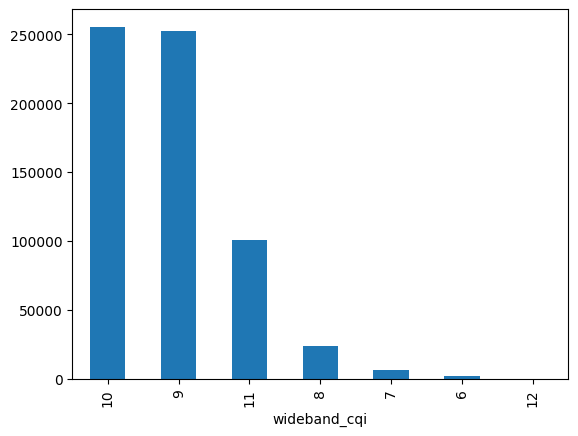

In [17]:
df_merged.wideband_cqi.value_counts().plot(kind='bar')

In [18]:
#Dropping redundant columns based on the dataset explanation.
df_merged = df_merged.drop(['rsrp_dBm', 'rssi_dBm', 'rsrq_dB', 'sinr_dB', 'sample_duration_ms', 'duration_ms','phy_throughput_bps','bler_percentage','mac_throughput_bps'], axis=1)

In [19]:
df_merged.cf1_percentage.value_counts()

cf1_percentage
0     640053
0         50
1          6
0          5
0          4
1          4
1          4
1          1
1          1
8          1
1          1
1          1
1          1
4          1
8          1
7          1
0          1
2          1
13         1
7          1
3          1
2          1
2          1
7          1
5          1
1          1
Name: count, dtype: int64

In [20]:
df_merged = df_merged.drop(['cf1_percentage'], axis=1)

In [21]:
df_merged.residual_bler_percentage.value_counts()

residual_bler_percentage
0    639230
0       251
0       229
0       121
0        78
0        59
0        56
0        27
0        23
0        20
0        13
0        13
0         4
0         4
0         2
0         2
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
0         1
Name: count, dtype: int64

In [22]:
df_merged = df_merged.drop(['residual_bler_percentage'], axis=1)

In [23]:
df_merged = df_merged.drop(['timestamp'], axis=1)

In [24]:
df_merged.head()

,rsrp0_dBm,rsrp1_dBm,rssi0_dBm,rssi1_dBm,rsrq0_dB,rsrq1_dB,sinr0_dB,sinr1_dB,pathloss_dB,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput0_bps,phy_throughput1_bps,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf2_percentage,cf3_percentage,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
0,-97,-112,-63,-78,-14,-14,6,5,112,97,25861,43840,26887705,10150201,7,11,739,93,7,6,0,0,709,678,9,10,10,6,7,8,8,6,11,10,10,11,11,34324846,73,27,9
1,-97,-112,-63,-79,-14,-13,4,2,112,96,35434,43840,34726128,0,9,0,490,57,43,9,0,0,490,444,9,10,10,7,7,8,8,6,11,11,10,12,12,29028577,100,0,9
2,-97,-112,-63,-78,-14,-13,4,3,112,96,33807,51048,34412928,1084704,10,20,525,100,0,10,0,0,519,469,9,10,10,7,7,8,8,6,11,11,10,11,11,29755796,94,6,9
3,-98,-112,-64,-79,-14,-13,5,4,112,96,23276,43840,25667632,10224768,8,13,771,99,1,6,0,0,739,696,9,10,10,6,7,8,8,6,11,11,10,12,11,31872152,79,21,9
4,-97,-112,-63,-78,-14,-14,5,3,112,96,28737,43840,30228952,3434742,9,16,615,98,2,9,0,0,606,551,9,11,10,7,7,8,8,6,11,11,10,12,11,32373883,91,9,9


In [25]:
df_merged.shape

(640145, 41)

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640145 entries, 0 to 640144
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   rsrp0_dBm                       640145 non-null  float64
 1   rsrp1_dBm                       640145 non-null  float64
 2   rssi0_dBm                       640145 non-null  float64
 3   rssi1_dBm                       640145 non-null  float64
 4   rsrq0_dB                        640145 non-null  float64
 5   rsrq1_dB                        640145 non-null  float64
 6   sinr0_dB                        640145 non-null  float64
 7   sinr1_dB                        640145 non-null  float64
 8   pathloss_dB                     640145 non-null  int64  
 9   prb_utilization_perc            640145 non-null  float64
 10  tbs_avg_bits                    640145 non-null  int64  
 11  tbs_max_bits                    640145 non-null  int64  
 12  phy_throughput0_

In [27]:
df_merged.isna().sum()

rsrp0_dBm                         0
rsrp1_dBm                         0
rssi0_dBm                         0
rssi1_dBm                         0
rsrq0_dB                          0
rsrq1_dB                          0
sinr0_dB                          0
sinr1_dB                          0
pathloss_dB                       0
prb_utilization_perc              0
tbs_avg_bits                      0
tbs_max_bits                      0
phy_throughput0_bps               0
phy_throughput1_bps               0
bler0_percentage                  0
bler1_percentage                  0
number_of_transport_blocks_x      0
cf2_percentage                    0
cf3_percentage                    0
retransmission1_percentage        0
retransmission2_percentage        0
retransmission3plus_percentage    0
number_of_transport_blocks_y      0
new_tb                            0
subband0                          0
subband1                          0
subband2                          0
subband3                    

In [28]:
df_merged.nunique()

rsrp0_dBm                             50
rsrp1_dBm                            126
rssi0_dBm                             88
rssi1_dBm                            176
rsrq0_dB                              76
rsrq1_dB                              91
sinr0_dB                             175
sinr1_dB                             187
pathloss_dB                            5
prb_utilization_perc                 872
tbs_avg_bits                       28461
tbs_max_bits                          60
phy_throughput0_bps               609828
phy_throughput1_bps               563788
bler0_percentage                     176
bler1_percentage                     611
number_of_transport_blocks_x         698
cf2_percentage                       999
cf3_percentage                       999
retransmission1_percentage           973
retransmission2_percentage           410
retransmission3plus_percentage       153
number_of_transport_blocks_y         672
new_tb                               661
subband0        

In [29]:
df_merged.describe()

,rsrp0_dBm,rsrp1_dBm,rssi0_dBm,rssi1_dBm,rsrq0_dB,rsrq1_dB,sinr0_dB,sinr1_dB,pathloss_dB,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput0_bps,phy_throughput1_bps,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf2_percentage,cf3_percentage,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
count,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145,640145
mean,-97,-112,-64,-78,-12,-14,11,8,112,91,28423,41266,28373453,20071596,10,10,864,85,15,6,0,0,829,780,9,9,10,9,10,9,9,8,10,10,10,11,11,53821646,31,69,10
std,0,2,1,2,1,1,4,4,1,11,5049,5356,4912194,11370702,2,8,181,26,26,2,0,0,168,166,1,1,2,2,1,2,1,1,1,1,1,1,1,16031270,37,37,1
min,-99,-115,-70,-85,-15,-19,2,-3,109,2,1139,4800,606420,0,3,0,65,0,0,1,0,0,63,61,6,5,5,5,4,3,3,3,6,5,5,8,6,22915732,0,0,6
25%,-97,-113,-65,-79,-13,-14,8,5,111,91,25699,39256,25802971,11142571,9,8,755,79,0,5,0,0,719,671,8,8,9,8,9,8,8,8,9,10,10,11,10,39483231,0,38,9
50%,-97,-113,-64,-79,-12,-14,12,8,112,96,29330,39256,29252083,23195107,10,9,959,100,0,6,0,0,916,866,9,9,10,9,10,9,9,9,11,10,10,11,11,55633072,12,88,10
75%,-96,-112,-64,-78,-12,-14,14,11,112,97,32226,43840,32025679,29821104,10,11,994,100,21,7,0,0,953,903,10,10,11,10,11,10,10,9,12,11,11,11,11,66367875,62,100,10
max,-93,-102,-61,-67,-7,-8,20,16,113,99,44412,75400,45415376,38658224,22,100,1100,100,100,13,5,2,1079,1003,14,14,14,13,13,13,13,11,13,13,13,14,14,84581250,100,100,12


<Axes: xlabel='wideband_cqi'>

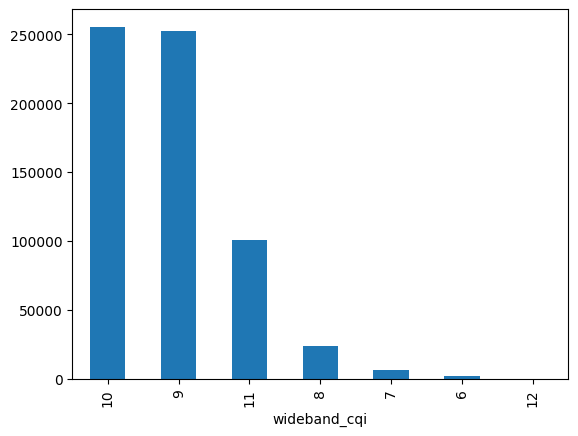

In [30]:
df_merged.wideband_cqi.value_counts().plot(kind='bar')

In [31]:
row_index_to_drop = df_merged.index[df_merged['wideband_cqi'] == 12]
row_index_to_drop

Index([335121], dtype='int64')

In [32]:
df_merged = df_merged.drop(row_index_to_drop)

<Axes: xlabel='wideband_cqi'>

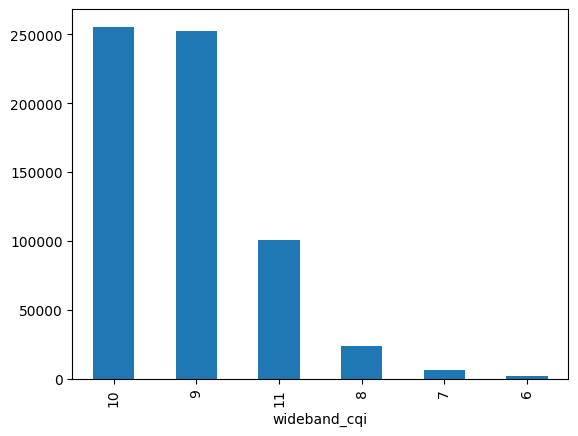

In [33]:
df_merged.wideband_cqi.value_counts().plot(kind='bar')

In [34]:
df_merged.corr()

,rsrp0_dBm,rsrp1_dBm,rssi0_dBm,rssi1_dBm,rsrq0_dB,rsrq1_dB,sinr0_dB,sinr1_dB,pathloss_dB,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput0_bps,phy_throughput1_bps,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf2_percentage,cf3_percentage,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
rsrp0_dBm,1,0,1,0,-0,0,0,0,-1,-0,-0,-0,-0,-0,0,-0,0,-0,0,0,0,-0,0,0,0,0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,0,-0
rsrp1_dBm,0,1,0,1,-0,0,0,0,-0,-0,-0,-0,-0,0,0,-0,0,-0,0,0,-0,-0,0,0,0,0,0,-0,-0,-0,-0,-0,0,-0,-0,0,0,-0,-0,0,-0
rssi0_dBm,1,0,1,0,-1,-0,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,-0,-1,1,0,0,0,-0,-0,0,0,-0,-0,-1,-1,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,-0
rssi1_dBm,0,1,0,1,-0,-0,-0,-0,-0,-0,-0,0,-0,-0,0,-0,-0,-0,0,0,0,0,-0,-0,0,0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,0,-0,-0
rsrq0_dB,-0,-0,-1,-0,1,0,0,0,0,0,0,0,0,0,0,-0,0,0,-0,-0,-0,-0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,-0,0,0
rsrq1_dB,0,0,-0,-0,0,1,1,1,-0,0,-0,-0,-0,1,0,-0,1,-0,0,-0,-0,-0,1,1,-0,0,1,0,0,0,-0,0,0,0,0,0,-0,0,-1,1,0
sinr0_dB,0,0,-0,-0,0,1,1,1,-0,0,0,-0,0,1,0,-0,1,0,-0,-1,-0,-0,1,1,-1,0,1,1,0,0,-0,1,1,1,0,0,0,1,-1,1,1
sinr1_dB,0,0,-0,-0,0,1,1,1,-0,0,0,-0,0,1,0,-0,1,0,-0,-1,-0,-0,1,1,-1,0,1,1,0,0,-0,0,1,1,0,0,-0,1,-1,1,0
pathloss_dB,-1,-0,-0,-0,0,-0,-0,-0,1,0,0,0,0,-0,-0,0,-0,0,-0,-0,-0,0,-0,-0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,0
prb_utilization_perc,-0,-0,-0,-0,0,0,0,0,0,1,1,0,1,0,-0,-0,0,0,-0,-0,-0,-0,0,0,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,-0,0,0


In [35]:
df_merged.dtypes

rsrp0_dBm                         float64
rsrp1_dBm                         float64
rssi0_dBm                         float64
rssi1_dBm                         float64
rsrq0_dB                          float64
rsrq1_dB                          float64
sinr0_dB                          float64
sinr1_dB                          float64
pathloss_dB                         int64
prb_utilization_perc              float64
tbs_avg_bits                        int64
tbs_max_bits                        int64
phy_throughput0_bps                 int64
phy_throughput1_bps                 int64
bler0_percentage                  float64
bler1_percentage                  float64
number_of_transport_blocks_x        int64
cf2_percentage                    float64
cf3_percentage                    float64
retransmission1_percentage        float64
retransmission2_percentage        float64
retransmission3plus_percentage    float64
number_of_transport_blocks_y        int64
new_tb                            

## Train & Test Set Split

In [36]:
df_merged_train, df_merged_test = train_test_split(df_merged, train_size = 0.7, random_state = 100)

In [37]:
print("Train Set: ", df_merged_train.shape)
print("Test Set : ", df_merged_test.shape)

Train Set:  (448100, 41)
Test Set :  (192044, 41)


In [38]:
df_merged_train.head()

,rsrp0_dBm,rsrp1_dBm,rssi0_dBm,rssi1_dBm,rsrq0_dB,rsrq1_dB,sinr0_dB,sinr1_dB,pathloss_dB,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput0_bps,phy_throughput1_bps,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf2_percentage,cf3_percentage,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
185289,-97,-113,-64,-78,-13,-14,6,2,112,97,33745,46912,33423541,0,9,0,519,80,20,10,0,0,519,467,11,8,7,8,9,9,11,9,8,11,10,11,11,30949663,100,0,9
509837,-96,-113,-65,-79,-11,-14,8,6,111,95,19678,39256,20633109,9149283,8,16,731,36,64,6,0,0,693,651,11,11,10,9,8,6,6,7,9,8,9,11,10,36683648,61,39,9
278097,-97,-112,-64,-79,-12,-14,14,10,112,97,31586,39256,31368694,31317297,9,7,1028,100,0,5,0,0,990,944,9,10,12,11,11,11,10,9,12,11,11,12,11,78591594,0,100,11
339426,-97,-113,-64,-79,-12,-14,13,9,112,98,30795,39256,30669836,30686704,9,9,1046,97,3,5,0,0,995,952,8,9,9,10,10,9,9,9,12,11,10,11,10,61288868,1,99,10
178488,-96,-113,-64,-77,-12,-15,7,3,112,85,24715,55080,24971557,4667090,10,40,596,100,0,6,2,0,555,507,10,8,7,7,9,9,11,8,9,10,10,11,11,33967586,86,14,9


In [39]:
df_merged_test.head()

,rsrp0_dBm,rsrp1_dBm,rssi0_dBm,rssi1_dBm,rsrq0_dB,rsrq1_dB,sinr0_dB,sinr1_dB,pathloss_dB,prb_utilization_perc,tbs_avg_bits,tbs_max_bits,phy_throughput0_bps,phy_throughput1_bps,bler0_percentage,bler1_percentage,number_of_transport_blocks_x,cf2_percentage,cf3_percentage,retransmission1_percentage,retransmission2_percentage,retransmission3plus_percentage,number_of_transport_blocks_y,new_tb,subband0,subband1,subband2,subband3,subband4,subband5,subband6,subband7,subband8,subband9,subband10,subband11,subband12,requested_throughput_bps,rank1_percentage,rank2_percentage,wideband_cqi
251015,-96,-113,-64,-79,-12,-14,15,12,112,97,33182,39256,32896336,32805728,10,8,990,100,0,5,0,0,950,899,9,10,12,11,11,10,9,9,12,11,11,12,10,76389843,0,100,11
611316,-97,-113,-65,-79,-11,-14,16,12,112,97,32086,46912,31761232,31769424,10,10,990,100,0,5,0,0,939,888,9,11,12,11,11,10,9,10,11,10,10,11,10,71744294,2,98,10
244194,-97,-113,-64,-79,-12,-13,12,8,112,96,29918,39256,29391984,29376380,11,11,990,100,0,6,0,0,935,883,8,9,11,10,11,10,9,9,12,11,10,11,10,66623675,0,100,10
541071,-96,-112,-62,-78,-14,-15,4,2,111,84,22895,39256,25075392,5238208,9,12,662,89,11,7,0,0,647,598,10,10,9,8,7,5,6,6,9,8,9,11,10,28674010,80,20,8
56674,-97,-113,-64,-80,-13,-13,12,9,112,97,30317,57360,30296859,19798375,12,15,846,100,0,7,1,0,796,734,9,8,9,8,10,9,10,8,10,10,10,11,11,45357577,49,51,9


In [40]:
y_train = df_merged_train.pop('wideband_cqi')
X_train = df_merged_train
y_test = df_merged_test.pop('wideband_cqi')
X_test = df_merged_test

In [41]:
print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (448100, 40)
y_train.shape : (448100,)
X_test.shape : (192044, 40)
y_test.shape : (192044,)


In [42]:
X_train_Save = X_train
y_train_Save = y_train
X_test_Save  = X_test
y_test_Save  = y_test

## SCALING : StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Treatment of Imbalancing : ADASYN

In [44]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Display the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y_train))

# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy={10: 178891, 9: 176459, 11: 70438, 8: 25000, 7: 15000, 6: 10000}, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Display the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampled))

X_train = X_train_resampled
y_train = y_train_resampled

Class distribution before ADASYN: Counter({10: 178891, 9: 176459, 11: 70438, 8: 16707, 7: 4264, 6: 1341})
Class distribution after ADASYN: Counter({10: 178891, 9: 176459, 11: 70438, 8: 23322, 7: 15077, 6: 10022})


## Model Building

### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt_classifier.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print(dt_cm)
accuracy_score(y_test, y_pred)

[[  521    22     0     0     0     0]
 [   29  1632   124     0     0     0]
 [    0   110  6267   756     0     0]
 [    0     1   899 70806  4069     1]
 [    0     0     0  4103 71817   661]
 [    0     0     0     0   722 29504]]


0.9401335110703797

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

# Assuming y_true and y_pred are your true labels and predicted labels
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
# Assuming y_true and y_pred are your true labels and predicted labels
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.059876903209681115
Root Mean Squared Error: 0.24474013109787032


### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_classifier.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print(rf_cm)
accuracy_score(y_test, y_pred)

[[  520    23     0     0     0     0]
 [   23  1692    70     0     0     0]
 [    0   105  6496   532     0     0]
 [    0     0   719 72595  2462     0]
 [    0     0     0  4112 72076   393]
 [    0     0     0     0   891 29335]]


0.9514173835162775

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
# Assuming y_true and y_pred are your true labels and predicted labels
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.04858261648372248
Root Mean Squared Error: 0.22041464670870328


### ANN

In [51]:
import torch
import torch.nn as nn

In [52]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(X_train.shape[1],80),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(80,80),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(80,12),   # output unit
    #nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANNclassify

Sequential(
  (0): Linear(in_features=40, out_features=80, bias=True)
  (1): ReLU()
  (2): Linear(in_features=80, out_features=80, bias=True)
  (3): ReLU()
  (4): Linear(in_features=80, out_features=12, bias=True)
)

In [53]:
# other model features

learningRate = .01

# loss function
lossfun = nn.CrossEntropyLoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [54]:
input_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_array = y_train.values
#y_train_array = np.expand_dims(y_train_array, axis=1)
output_tensor = torch.tensor(y_train_array, dtype=torch.int64)


In [55]:
input_tensor.shape

torch.Size([474209, 40])

In [56]:
output_tensor.shape

torch.Size([474209])

In [57]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(input_tensor)

  # compute loss
  loss = lossfun(yHat,output_tensor)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == output_tensor # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNclassify(input_tensor)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == output_tensor).float())

In [58]:
torch.argmax(yHat,axis=1)

tensor([ 9,  9, 11,  ...,  9,  9,  9])

Final accuracy: 84.7173%


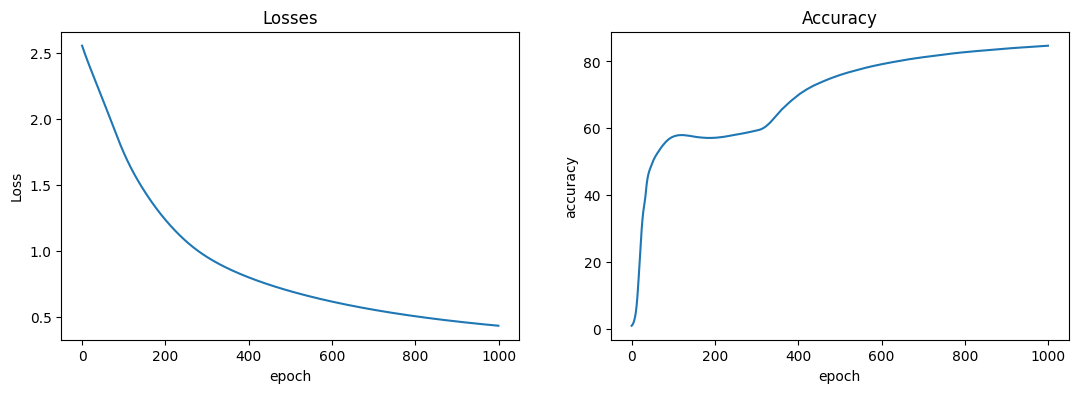

In [59]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

### XGBOOST

In [60]:
import xgboost as xgb
#from xgboost import XGBClassifier

model = xgb.XGBClassifier(n_jobs = -1, objective='multi:softmax')
model.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_encoded_test = label_encoder.fit_transform(y_test)

In [62]:
len(set(y_train))

6

In [63]:
y_train

0          9
1          9
2         11
3         10
4          9
          ..
474204     8
474205     8
474206     8
474207     8
474208     8
Name: wideband_cqi, Length: 474209, dtype: int64

In [64]:
# Train the XGBoost model
model.fit(X_train, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [65]:
xgb_predictions = model.predict(X_test)

In [66]:
accuracy_score(y_encoded_test, xgb_predictions)

0.9681479244339839

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

mae = mean_absolute_error(y_encoded_test, xgb_predictions)

print(f'Mean Absolute Error: {mae}')
# Assuming y_true and y_pred are your true labels and predicted labels
mse = mean_squared_error(y_encoded_test, xgb_predictions)
rmse = math.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.03185207556601612
Root Mean Squared Error: 0.17847149790937522


## Important Variables Selection

In [68]:
from sklearn.feature_selection import RFE

# Create an RFE object
n_features_to_select = 20  # You can adjust this based on the desired number of features
rfe = RFE(estimator=rf_classifier, n_features_to_select=n_features_to_select)

In [69]:
# Fit RFE to the training data
X_train_rfe = rfe.fit_transform(X_train_Save, y_train_Save)

In [70]:
rf_classifier.fit(X_train_rfe, y_train_Save)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [71]:
# Transform the test data using the selected features
X_test_rfe = rfe.transform(X_test_Save)

In [72]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_rfe)

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9549269958967737


In [74]:
col = X_train_Save.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

df_temp = pd.DataFrame(list(zip(X_train_Save.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
df_temp = df_temp.loc[df_temp['rfe_support'] == True]
df_temp.reset_index(drop=True, inplace=True)

df_temp

,Variable,rfe_support,rfe_ranking
0,sinr0_dB,True,1
1,tbs_avg_bits,True,1
2,phy_throughput0_bps,True,1
3,phy_throughput1_bps,True,1
4,new_tb,True,1
5,subband0,True,1
6,subband1,True,1
7,subband2,True,1
8,subband3,True,1
9,subband4,True,1
